
<div id="Tópicos">
    <h2>Questões</h2>
</div>


<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol> 
<li> Colete os preços e volumes de um conjunto de ativos durante o período de 3 (três) anos, pertencentes a no mínimo 5 (cinco) Índices de Segmentos e Setoriais diferentes, e separe os 50 (cinquenta) ativos mais líquidos; </li><p></p>
    <li>Construa uma amostra de treinamento e outra de teste, sendo a primeira com os 2 (dois) primeiros anos e a segunda com o último anos; </li> <p></p>
    <li> Na amostra de treinamento, aplique uma clusterização não supervisionada (K-Means ou DBSCAN) e separe um ativo para cada clusters, com o critério que desejar (sugestão maior índice Sharpe); </li><p></p>
    <li> Aplique a Teoria do Portfolio Moderno de Markowitz nos ativos escolhidos no passo anterior, no sentido de alocar um capital de R$100.000,00; </li><p></p>
    <li> Verifique o resultado da alocação de capital com Markowitz, nos ativos separados na fase de treinamento, amostra de teste que representa o último ano da aquisição; </li><p></p>
    <li> Descreva suas impressores relativas ao processo e resultados encontrados. </li>
</ol>
</div>


<ul>
<li>Fonte: http://www.bmfbovespa.com.br/pt_br/produtos/indices/</li>
<li>yahoo finance API</li>
</ul>    

In [3]:
%matplotlib notebook 
import matplotlib.dates as mdates
#from matplotlib.finance import candlestick_ohlc
import datetime
from pandas import *
import matplotlib.mlab as mlab
import scipy.signal as signal
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_datareader.data as pdr
import yfinance as yf
import datetime as dt
import matplotlib.ticker as mticker
sns.set()

def yahoo(symbols,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year):
    yf.pdr_override()       
    stocks_yahoo = pdr.get_data_yahoo(symbols, start=datetime(S_Year, S_Month, S_Day), end=datetime(E_Year, E_Month, E_Day),   as_panel = False,)
    return stocks_yahoo

In [5]:
E_Day = 30
E_Month = 8
E_Year = 2020
S_Day = 30
S_Month = 8
S_Year = 2019

In [6]:
index_list = ['2020.04.03 IBrA2.xls']
#index_list = ['Lista_ativos_advfn.csv']
melhores_volumes = []

#==================================================================================================#

for names in index_list:
    
    # Leitura do arquivo .xls do indice

    data = pd.read_html(names)[0]['Código']
    data.to_frame()
    data.values
    symbols=list(data.values)

    Stocks=[]
    
    for symbol in symbols:
        if len(symbol)==5:
            Stocks.append(symbol)

    
    Stocks=[Stocks[k]+'.SA' for k in range(len(Stocks))]
    
    # Download

    stocks_all = yahoo(Stocks,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year)

    # Coleta dos volumes 

    stocks_volume = stocks_all['Volume']

    volumes = ['none'] * len(Stocks)

    for i in range(len(Stocks)):
        volumes[i] = stocks_volume[Stocks[i]].sum()
    n_volumes = np.array(volumes)



[*********************100%***********************]  142 of 142 downloaded


In [7]:
stocks_vol = stocks_all.copy()
stocks_vol = stocks_vol['Volume'].mean().sort_values(ascending = False)
stocks_vol.head()

VVAR3.SA    7.158180e+07
PETR4.SA    6.885041e+07
COGN3.SA    4.087843e+07
ITUB4.SA    3.307108e+07
BBDC4.SA    3.280466e+07
dtype: float64

In [8]:
# Leitura do arquivo .xls do indice

data = pd.read_html('2020.08.31 IDIV.xls')[0]['Código']
data.to_frame()
data.values
symbols=list(data.values)

Stocks = []
for symbol in symbols:
    if len(symbols)==5:
        Stocks.append(symbol)
    Stocks.append(symbol)
        
Stocks=[Stocks[k]+'.SA' for k in range(len(Stocks))]
Stocks = Stocks[:-2]


stocks_idiv = yahoo(Stocks,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year)


[*********************100%***********************]  35 of 35 downloaded


In [9]:
stocks_vol = stocks_idiv.copy()
stocks_vol = stocks_vol['Volume'].mean().sort_values(ascending = False)
stocks_vol.head()

ITUB4.SA    3.307108e+07
CIEL3.SA    2.916137e+07
ITSA4.SA    2.683756e+07
BBAS3.SA    1.705255e+07
CMIG4.SA    1.113719e+07
dtype: float64

In [10]:
# Leitura do arquivo .xls do indice

data = pd.read_html('2020.08.31 SMLL.xls')[0]['Código']
data.to_frame()
data.values
symbols=list(data.values)

Stocks = []
for symbol in symbols:
    if len(symbols)==5:
        Stocks.append(symbol)
    Stocks.append(symbol)
        
Stocks=[Stocks[k]+'.SA' for k in range(len(Stocks))]
Stocks = Stocks[:-2]


stocks_smll = yahoo(Stocks,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year)


[*********************100%***********************]  90 of 90 downloaded


In [11]:
stocks_vol = stocks_smll.copy()
stocks_vol = stocks_vol['Volume'].mean().sort_values(ascending = False)
stocks_vol.head()

VVAR3.SA    7.158180e+07
COGN3.SA    4.087843e+07
USIM5.SA    1.912689e+07
TCSA3.SA    1.608740e+07
GOAU4.SA    1.466345e+07
dtype: float64

In [12]:
# Leitura do arquivo .xls do indice

data = pd.read_html('2020.08.31 IMOB.xls')[0]['Código']
data.to_frame()
data.values
symbols=list(data.values)

Stocks = []
for symbol in symbols:
    if len(symbols)==5:
        Stocks.append(symbol)
    Stocks.append(symbol)
        
Stocks=[Stocks[k]+'.SA' for k in range(len(Stocks))]
Stocks = Stocks[:-2]


stocks_imob = yahoo(Stocks,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year)

[*********************100%***********************]  17 of 17 downloaded


In [13]:
stocks_vol = stocks_imob.copy()
stocks_vol = stocks_vol['Volume'].mean().sort_values(ascending = False)
stocks_vol.head()

TCSA3.SA    1.608740e+07
BRML3.SA    1.258833e+07
JHSF3.SA    7.748510e+06
CYRE3.SA    6.646340e+06
MRVE3.SA    5.723101e+06
dtype: float64

In [14]:
# Leitura do arquivo .xls do indice

data = pd.read_html('2020.08.31 IMAT.xls')[0]['Código']
data.to_frame()
data.values
symbols=list(data.values)

Stocks = []
for symbol in symbols:
    if len(symbols)==5:
        Stocks.append(symbol)
    Stocks.append(symbol)
        
Stocks=[Stocks[k]+'.SA' for k in range(len(Stocks))]
Stocks = Stocks[:-2]


stocks_imat = yahoo(Stocks,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year)

[*********************100%***********************]  11 of 11 downloaded


In [15]:
stocks_vol = stocks_imat.copy()
stocks_vol = stocks_vol['Volume'].mean().sort_values(ascending = False)
stocks_vol.head()

VALE3.SA    2.601874e+07
USIM5.SA    1.912689e+07
GGBR4.SA    1.596406e+07
GOAU4.SA    1.466345e+07
CSNA3.SA    1.272296e+07
dtype: float64

In [16]:
# Leitura do arquivo .xls do indice

data = pd.read_html('2020.08.31 IEE.xls')[0]['Código']
data.to_frame()
data.values
symbols=list(data.values)

Stocks = []
for symbol in symbols:
    if len(symbols)==5:
        Stocks.append(symbol)
    Stocks.append(symbol)
        
Stocks=[Stocks[k]+'.SA' for k in range(len(Stocks))]
Stocks = Stocks[:-2]


stocks_iee = yahoo(Stocks,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year)

[*********************100%***********************]  18 of 18 downloaded


In [17]:
stocks_vol = stocks_iee.copy()
stocks_vol = stocks_vol['Volume'].mean().sort_values(ascending = False)
stocks_vol.head()

CMIG4.SA    1.113719e+07
EQTL3.SA    7.825587e+06
ELET3.SA    5.621941e+06
LIGT3.SA    3.226444e+06
CPFE3.SA    3.110340e+06
dtype: float64

In [18]:
# Leitura do arquivo .xls do indice

data = pd.read_html('2020.08.31 UTIL.xls')[0]['Código']
data.to_frame()
data.values
symbols=list(data.values)

Stocks = []
for symbol in symbols:
    if len(symbols)==5:
        Stocks.append(symbol)
    Stocks.append(symbol)
        
Stocks=[Stocks[k]+'.SA' for k in range(len(Stocks))]
Stocks = Stocks[:-2]


stocks_util = yahoo(Stocks,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year)

[*********************100%***********************]  24 of 24 downloaded


In [19]:
stocks_vol = stocks_util.copy()
stocks_vol = stocks_vol['Volume'].mean().sort_values(ascending = False)
stocks_vol.head()

CMIG4.SA    1.113719e+07
EQTL3.SA    7.825587e+06
ELET3.SA    5.621941e+06
SBSP3.SA    3.624095e+06
LIGT3.SA    3.226444e+06
dtype: float64

In [20]:
all_names= []
frames = [stocks_all,stocks_smll,stocks_idiv,stocks_imob,stocks_imat,stocks_iee]
total_stocks = pd.concat(frames)
indexes = total_stocks['Adj Close'].dropna().transpose().index

for i in range(0, len(indexes)):
    all_names.append(total_stocks['Adj Close'].dropna().transpose().index[i])

all_names.remove("NTCO3.SA") 
all_names.remove("VIVA3.SA")
all_names.remove("CEAB3.SA")
all_names

['ABCB4.SA',
 'ABEV3.SA',
 'ALPA4.SA',
 'ALSO3.SA',
 'ALUP11.SA',
 'AMAR3.SA',
 'ANIM3.SA',
 'ARZZ3.SA',
 'AZUL4.SA',
 'B3SA3.SA',
 'BBAS3.SA',
 'BBDC3.SA',
 'BBDC4.SA',
 'BBSE3.SA',
 'BEEF3.SA',
 'BIDI11.SA',
 'BIDI4.SA',
 'BKBR3.SA',
 'BPAC11.SA',
 'BPAN4.SA',
 'BRAP4.SA',
 'BRDT3.SA',
 'BRFS3.SA',
 'BRKM5.SA',
 'BRML3.SA',
 'BRPR3.SA',
 'BRSR6.SA',
 'BTOW3.SA',
 'CAML3.SA',
 'CCRO3.SA',
 'CESP6.SA',
 'CIEL3.SA',
 'CMIG3.SA',
 'CMIG4.SA',
 'CNTO3.SA',
 'COCE5.SA',
 'COGN3.SA',
 'CPFE3.SA',
 'CPLE3.SA',
 'CPLE6.SA',
 'CRFB3.SA',
 'CSAN3.SA',
 'CSMG3.SA',
 'CSNA3.SA',
 'CVCB3.SA',
 'CYRE3.SA',
 'DIRR3.SA',
 'DMMO3.SA',
 'DTEX3.SA',
 'ECOR3.SA',
 'EGIE3.SA',
 'ELET3.SA',
 'ELET6.SA',
 'EMBR3.SA',
 'ENAT3.SA',
 'ENBR3.SA',
 'ENEV3.SA',
 'ENGI11.SA',
 'EQTL3.SA',
 'EVEN3.SA',
 'EZTC3.SA',
 'FLRY3.SA',
 'GFSA3.SA',
 'GGBR4.SA',
 'GNDI3.SA',
 'GOAU4.SA',
 'GOLL4.SA',
 'GRND3.SA',
 'GUAR3.SA',
 'HAPV3.SA',
 'HBOR3.SA',
 'HGTX3.SA',
 'HYPE3.SA',
 'IGTA3.SA',
 'IRBR3.SA',
 'ITSA4.SA',
 'ITUB3.

In [21]:
def Remove(duplicate): 
    final_list = [] 
    for num in duplicate: 
        if num not in final_list: 
            final_list.append(num) 
    return final_list 

<div id="Tópico 1">
    <div class="alert alert-block alert-info" style="margin-top: 0px"> 
</div> </div> 

In [22]:
%matplotlib inline 
import matplotlib.dates as mdates
#from matplotlib.finance import candlestick_ohlc
import datetime
from pandas import *
import matplotlib.mlab as mlab
import scipy.signal as signal
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_datareader.data as pdr
import yfinance as yf
import datetime as dt
import matplotlib.ticker as mticker
from pandas_datareader import data
sns.set()

def yahoo(symbols,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year):
    yf.pdr_override()      
    stocks_yahoo = pdr.get_data_yahoo(symbols, start=datetime(S_Year, S_Month, S_Day), end=datetime(E_Year, E_Month, E_Day),   as_panel = False,)
    return stocks_yahoo

In [23]:
E_Day = 30
E_Month = 8
E_Year = 2020
S_Day = 30
S_Month = 8
S_Year = 2019

    ### Analise dos ativos com maior volume
market_all=yahoo(all_names,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year)

[*********************100%***********************]  149 of 149 downloaded


In [24]:
# market_all.head()
market_all.tail()

Adj Close                                                         \
            ABCB4.SA ABEV3.SA ALPA4.SA ALSO3.SA ALUP11.SA AMAR3.SA ANIM3.SA   
Date                                                                          
2020-08-24     13.86    12.86    36.54    27.63     23.80     7.85    27.55   
2020-08-25     13.80    12.75    35.84    27.63     23.74     8.51    28.26   
2020-08-26     13.54    12.70    34.75    26.60     23.59     8.30    28.59   
2020-08-27     13.48    12.68    34.60    26.42     23.36     8.46    29.75   
2020-08-28     13.67    12.75    37.86    27.20     23.70     8.66    30.88   

                                       ...    Volume                          \
           ARZZ3.SA AZUL4.SA B3SA3.SA  ...  UNIP6.SA    USIM5.SA    VALE3.SA   
Date                                   ...                                     
2020-08-24    53.00    22.57    60.08  ...  172500.0   9591700.0  17944700.0   
2020-08-25    54.00    21.95    61.01  ...  113300.0  18090700.0  23543000.0   
2020-08-26    54.17    21.59    59.68  ...  202400.0  20185200.0  23924400.0   
2020-08-27    54.80    22.37    59.47  ...   60000.0  10742800.0  18201900.0   
2020-08-28    57.06    22.88    60.20  ...  142600.0  18818000.0  15040300.0   

                                                                               \
             VIVT4.SA  VLID3.SA   VULC3.SA     VVAR3.SA   WEGE3.SA   WIZS3.SA   
Date                                                                            
2020-08-24  1106200.0  628200.0  1664100.0   68538100.0  5249600.0  2207600.0   
2020-08-25  1140300.0  442200.0  1032600.0   59162400.0  5044900.0  1380900.0   
2020-08-26  1631300.0  575400.0  1184100.0  105365000.0  6922800.0  1060100.0   
2020-08-27  1326300.0  623800.0   680900.0   62908100.0  3476300.0   593600.0   
2020-08-28  1249100.0  583700.0   657000.0   65760500.0  3854100.0   424400.0   

                       
             YDUQ3.SA  
Date                   
2020-08-24  3975100.0  
2020-08-25  2963100.0  
2020-08-26  2968100.0  
2020-08-27  8055600.0  
2020-08-28  6769000.0  

[5 rows x 894 columns]

In [25]:
market_all['Volume'].mean().sort_values(ascending = False)[:50]

VVAR3.SA     7.158180e+07
PETR4.SA     6.885041e+07
COGN3.SA     4.087843e+07
ITUB4.SA     3.307108e+07
BBDC4.SA     3.280466e+07
CIEL3.SA     2.916137e+07
ABEV3.SA     2.695904e+07
ITSA4.SA     2.683756e+07
VALE3.SA     2.601874e+07
IRBR3.SA     2.511878e+07
PETR3.SA     1.928295e+07
USIM5.SA     1.912689e+07
BBAS3.SA     1.705255e+07
JBSS3.SA     1.693899e+07
TCSA3.SA     1.608740e+07
GGBR4.SA     1.596406e+07
GOAU4.SA     1.466345e+07
MGLU3.SA     1.306856e+07
B3SA3.SA     1.283038e+07
CSNA3.SA     1.272296e+07
BRML3.SA     1.258833e+07
MRFG3.SA     1.257672e+07
CMIG4.SA     1.113719e+07
AZUL4.SA     1.022820e+07
RAIL3.SA     9.467786e+06
GOLL4.SA     9.459930e+06
POMO4.SA     8.709701e+06
BRFS3.SA     8.673285e+06
EMBR3.SA     8.600034e+06
LAME4.SA     8.068911e+06
UGPA3.SA     8.001625e+06
EQTL3.SA     7.825587e+06
RADL3.SA     7.808558e+06
CCRO3.SA     7.768936e+06
JHSF3.SA     7.748510e+06
SUZB3.SA     7.552546e+06
TIMP3.SA     7.500956e+06
RENT3.SA     7.405713e+06
BRDT3.SA    

In [26]:
lista=market_all['Volume'].mean().sort_values(ascending = False)[:50].index
names = []
for i in range(0, len(lista)):
    names.append(lista[i])

In [27]:
E_Day = 30
E_Month = 9
E_Year = 2019
S_Day = 30
S_Month = 9
S_Year = 2017

    ### Analise dos ativos com maior volume
market_all=yahoo(names,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year)
market_close=market_all['Adj Close']

[*********************100%***********************]  50 of 50 downloaded


['Erros', 104, 'Ativos', 50]

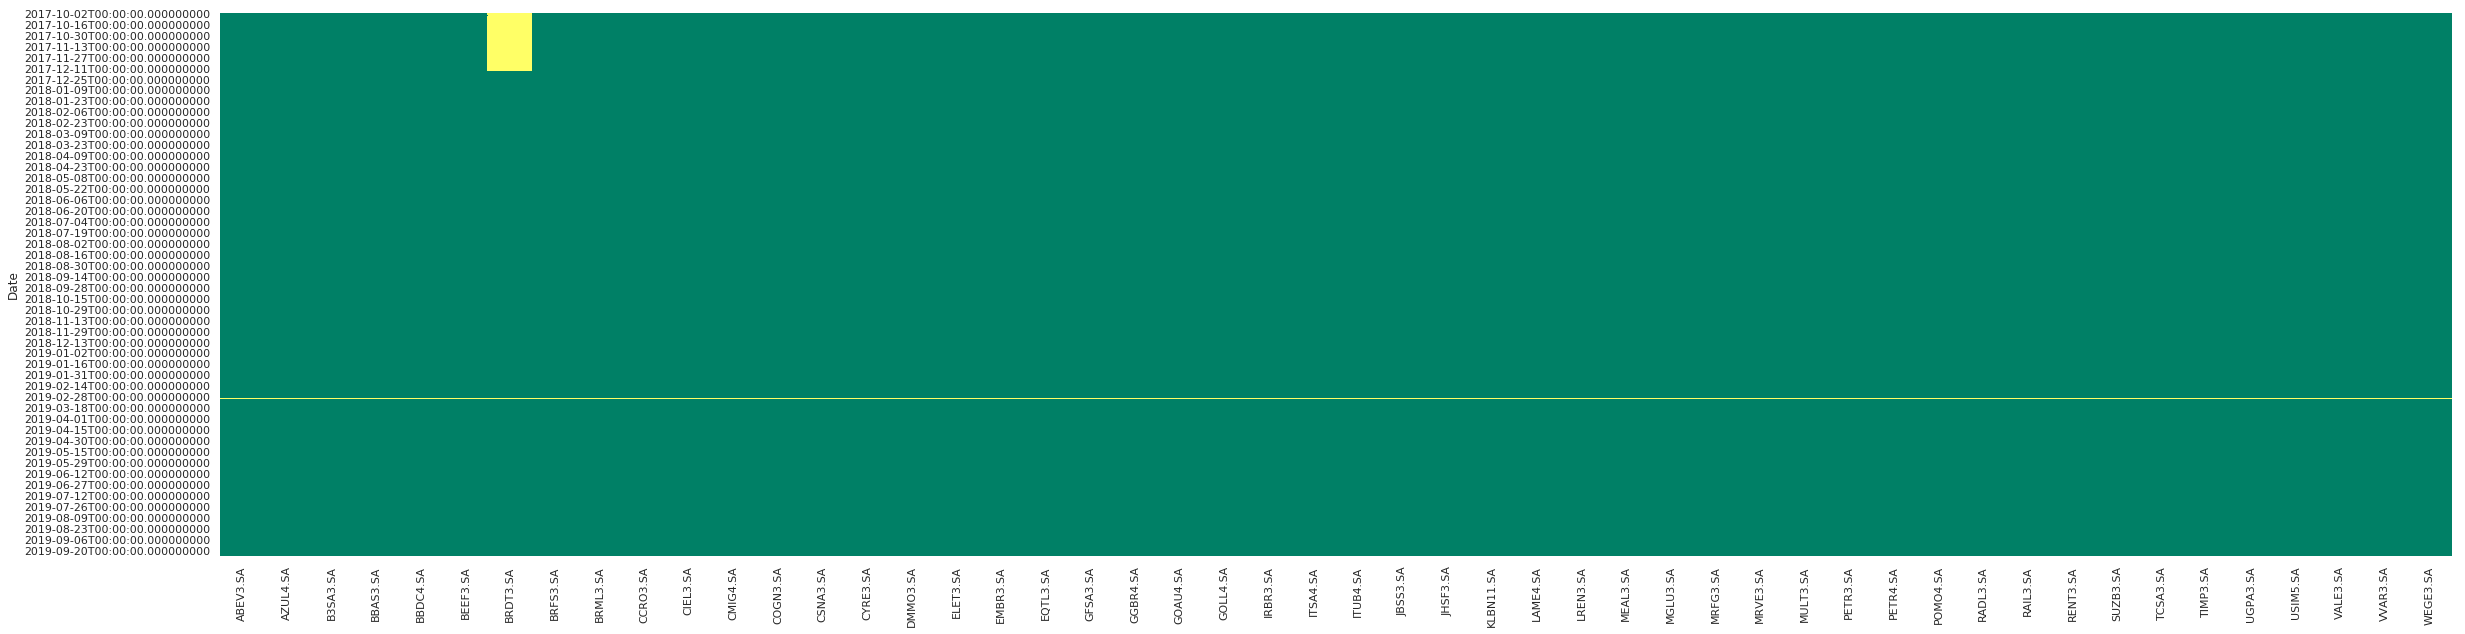

In [28]:
output = market_close
plt.figure(figsize=(40,10))
sns.heatmap(output.isnull(),  cbar=False, cmap = 'summer')
["Erros",np.sum(output.isnull().sum()),"Ativos",len(output.columns)]

['Erros', 0, 'Ativos', 50]

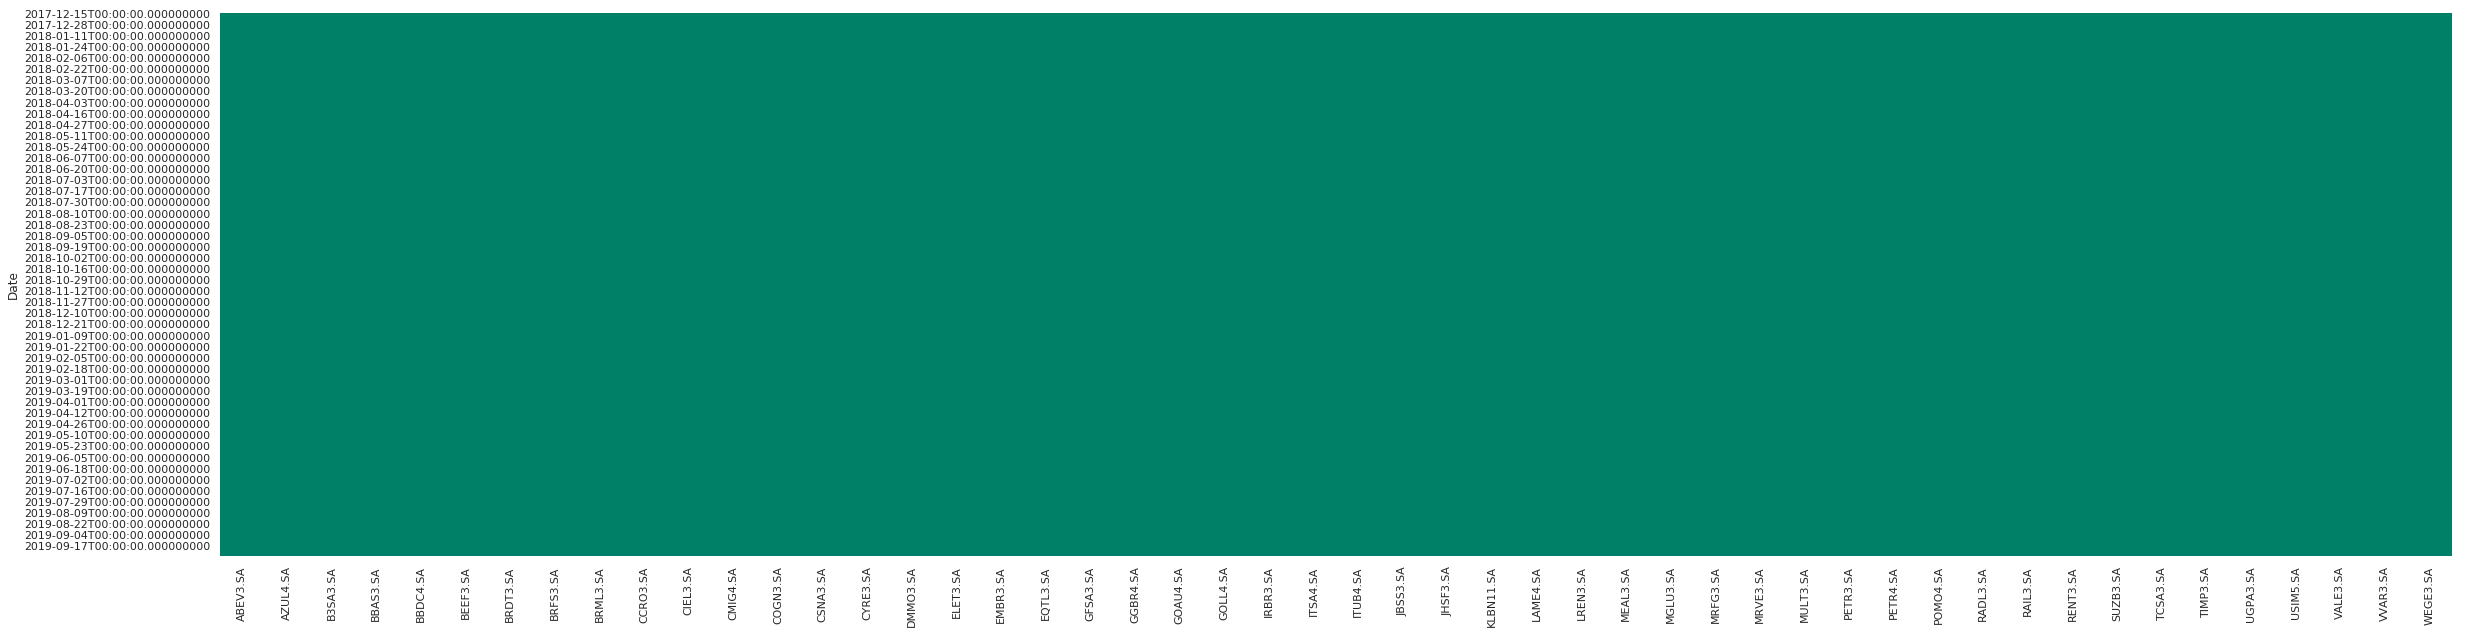

In [29]:
output=output.dropna(axis='index')
plt.figure(figsize=(40,10))
sns.heatmap(output.isnull(),  cbar=False, cmap = 'summer')
["Erros",np.sum(output.isnull().sum()),"Ativos",len(output.columns)]

In [30]:
market_close=output

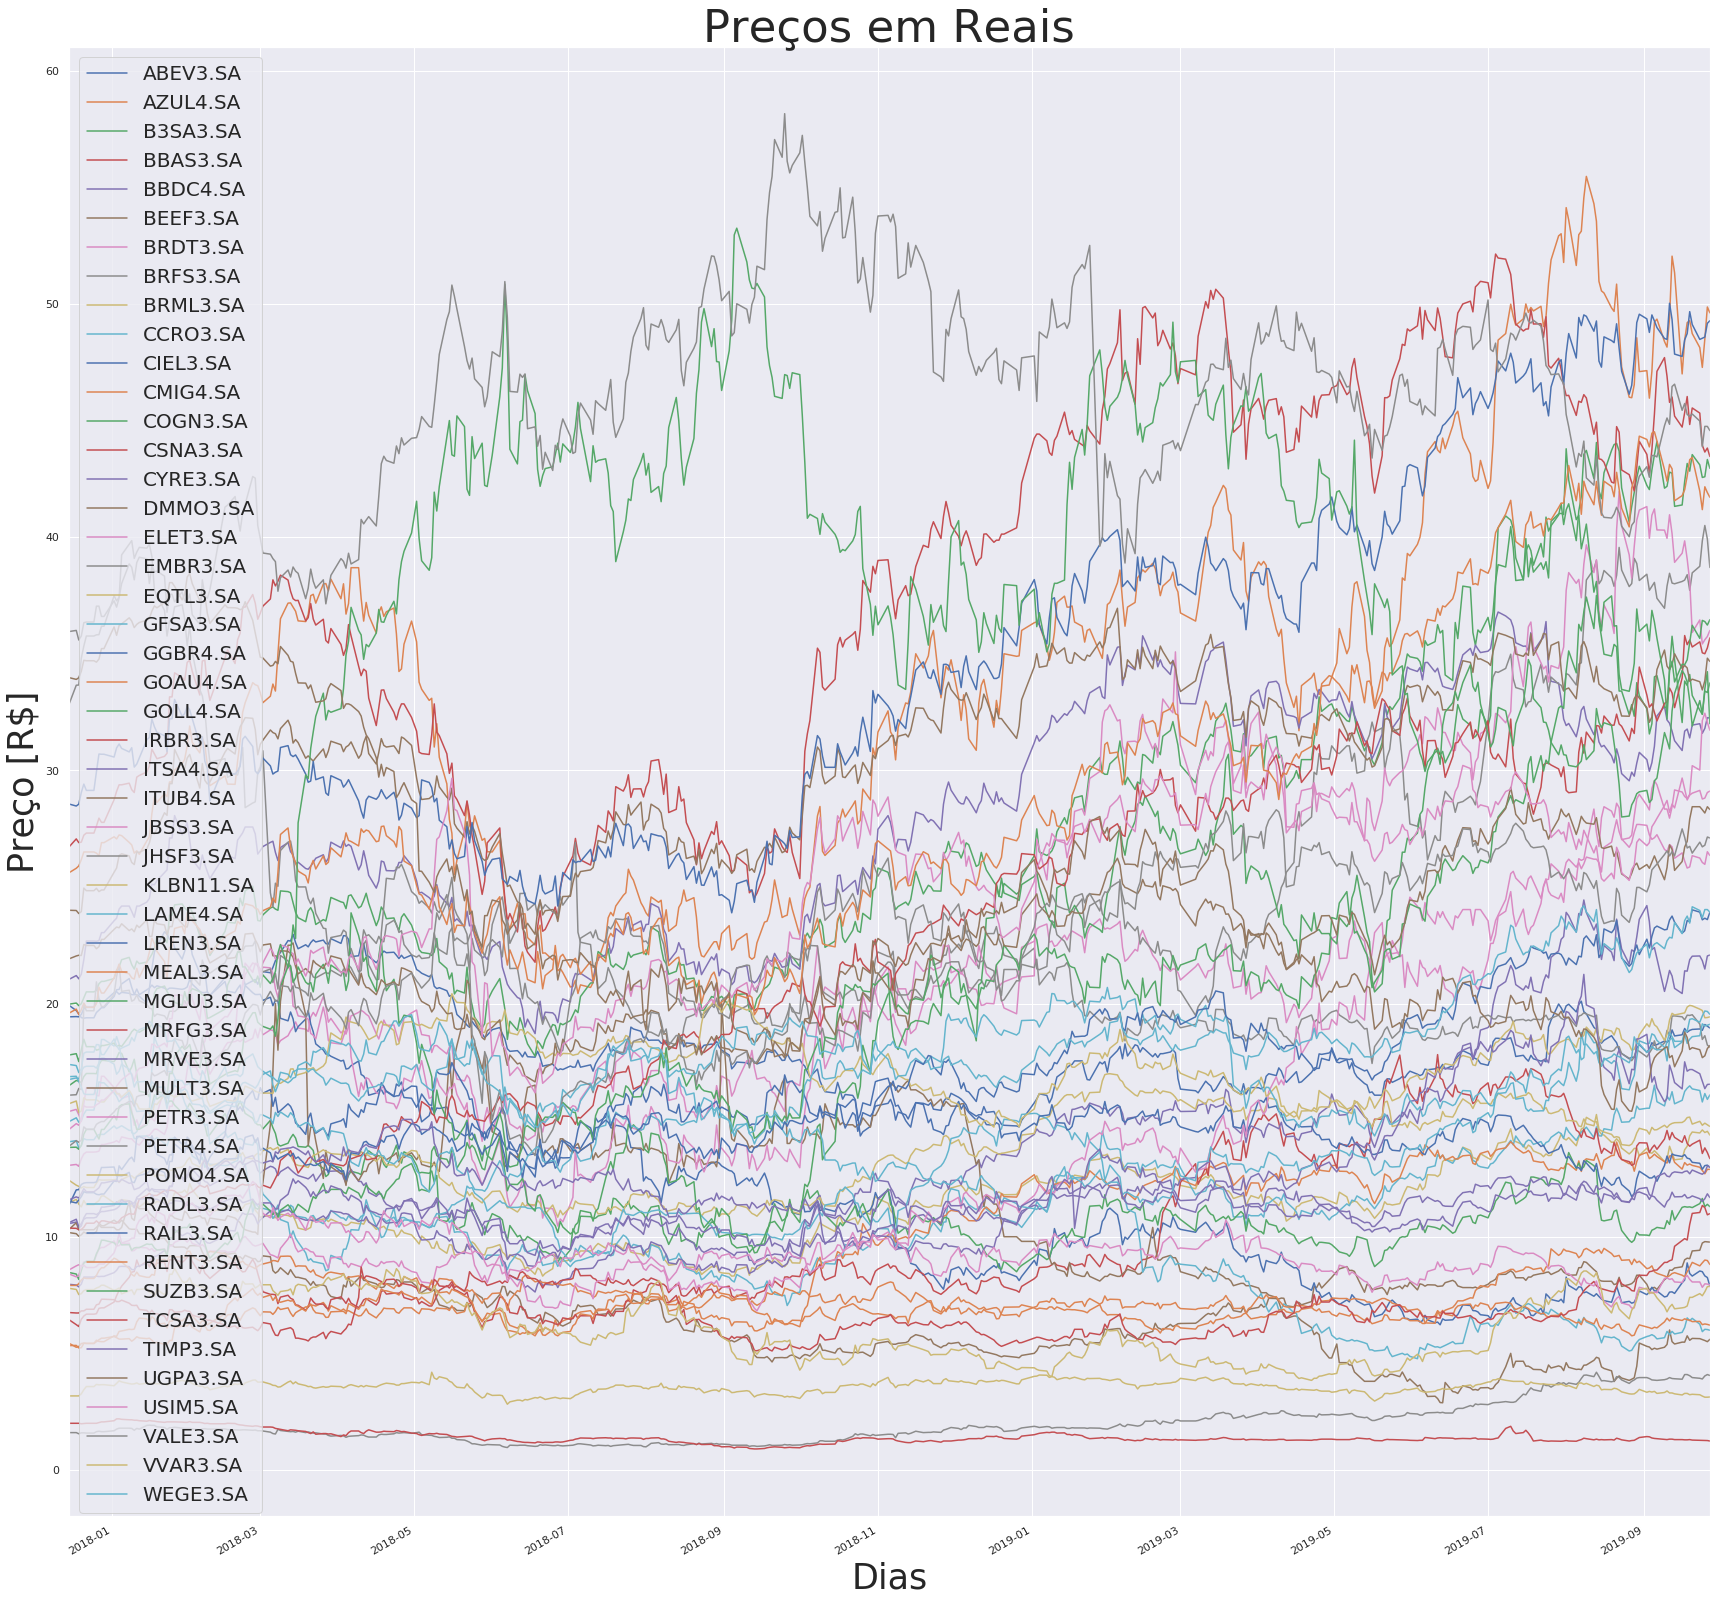

In [31]:
    #PLot gráfico dos ativos em linha

fig = plt.subplots(figsize=(100,30))
ax1=plt.subplot(1,3,3)
market_close.plot(ax=ax1)
ax1.set_title('Preços em Reais',fontsize=45)
ax1.set_ylabel('Preço [R$]',fontsize=35)
ax1.set_xlabel('Dias',fontsize=35)
ax1.legend(loc='upper left',fontsize=20)

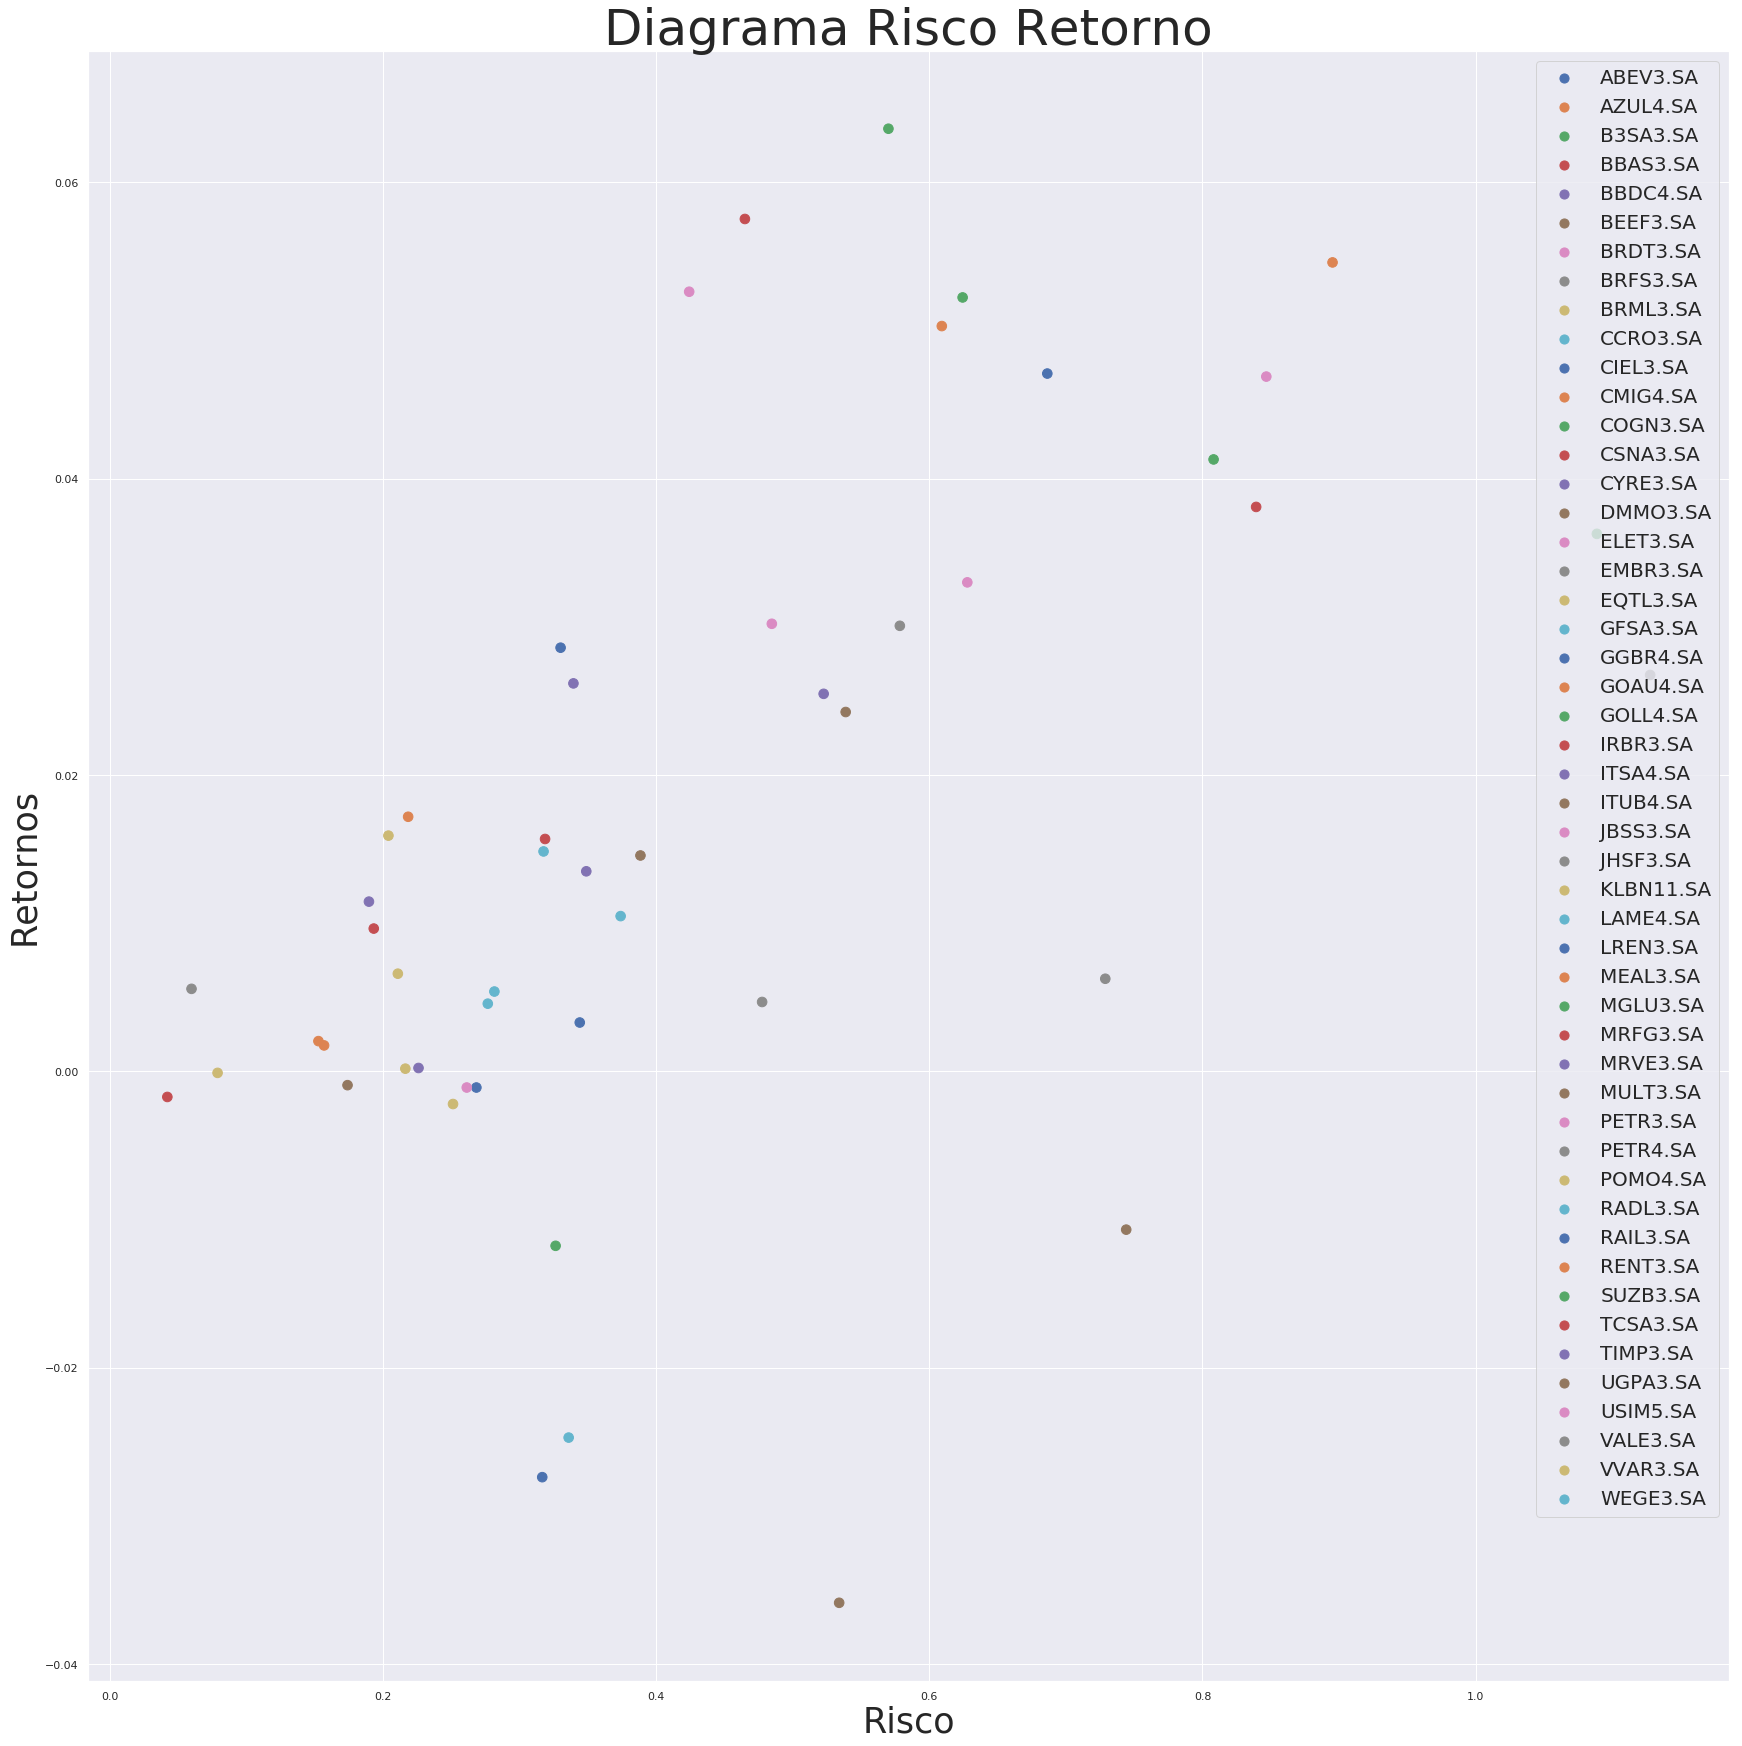

In [32]:
fig = plt.subplots(figsize=(100,30))
ax2=plt.subplot(1,3, 3) 
colors = np.random.rand(5)
x = market_close.diff().dropna().std().values
y = market_close.diff().dropna().mean().values
classes = market_close[market_close.columns].mean().values/market_close[market_close.columns].std().values
lbl = market_close.iloc[0].index

#Plota o diagrama de risco e retorno dos ativos

for i in range(len(x)):
    ax2.scatter(x[i],y[i],  s=10*classes, label = market_close.iloc[0].index[i])

ax2.legend(loc='upper right', fontsize=20)
ax2.set_xlabel("Risco",fontsize=35)
ax2.set_ylabel('Retornos',fontsize=35)
ax2.set_title('Diagrama Risco Retorno',fontsize=50) 

plt.show()

In [33]:
stocks_return = []    
stocks_prices  = []
p_names = []

# Seleciona apenas os ativos com rendimento positivo/negativo

first = []
last = []
ret_in_time = []

for d in market_close:
    first.append(market_close.iloc[0][d])
    last.append(market_close.iloc[-1][d])

    
for num in range(0, len(first)):
    n = last[num]/first[num]
    ret_in_time.append(n)
    
valor = market_close.diff().mean()

# Alternável para alta e baixa
for i in range(len(valor)):
    if (valor[i] > 0):
        p_names.append(valor.index[i])
        stocks_prices.append(ret_in_time[i])
        
market_all=yahoo(p_names,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year)
market_close=market_all['Adj Close']

[*********************100%***********************]  39 of 39 downloaded


In [34]:
market_close.tail()

,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC4.SA,BRDT3.SA,BRFS3.SA,BRML3.SA,CCRO3.SA,CMIG4.SA,CSNA3.SA,...,PETR3.SA,PETR4.SA,RADL3.SA,RAIL3.SA,RENT3.SA,SUZB3.SA,TIMP3.SA,VALE3.SA,VVAR3.SA,WEGE3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2019-09-23,48.13,43.10,45.32,32.00,26.24,38.75,14.45,16.27,12.98,14.14,...,29.14,26.92,18.62,23.92,41.97,32.99,11.63,44.98,7.56,23.99
2019-09-24,47.28,42.56,43.94,31.59,26.05,39.84,14.58,15.78,12.84,13.57,...,28.77,26.72,19.13,23.59,41.18,32.41,11.51,43.88,7.47,23.67
2019-09-25,48.50,42.59,43.65,31.80,25.97,40.50,14.47,16.14,12.70,13.81,...,28.81,26.79,19.04,23.66,42.16,33.40,11.63,44.75,7.64,24.03
2019-09-26,49.87,43.33,43.82,32.26,26.51,39.92,14.52,15.89,12.89,13.61,...,29.05,27.14,19.07,23.60,41.91,33.34,11.84,44.75,7.86,24.03
2019-09-27,49.62,42.95,43.46,32.24,26.35,38.70,14.36,16.08,12.89,13.35,...,29.11,27.10,19.11,23.91,41.71,33.75,11.68,44.57,7.87,23.92


['Erros', 93, 'Ativos', 39]

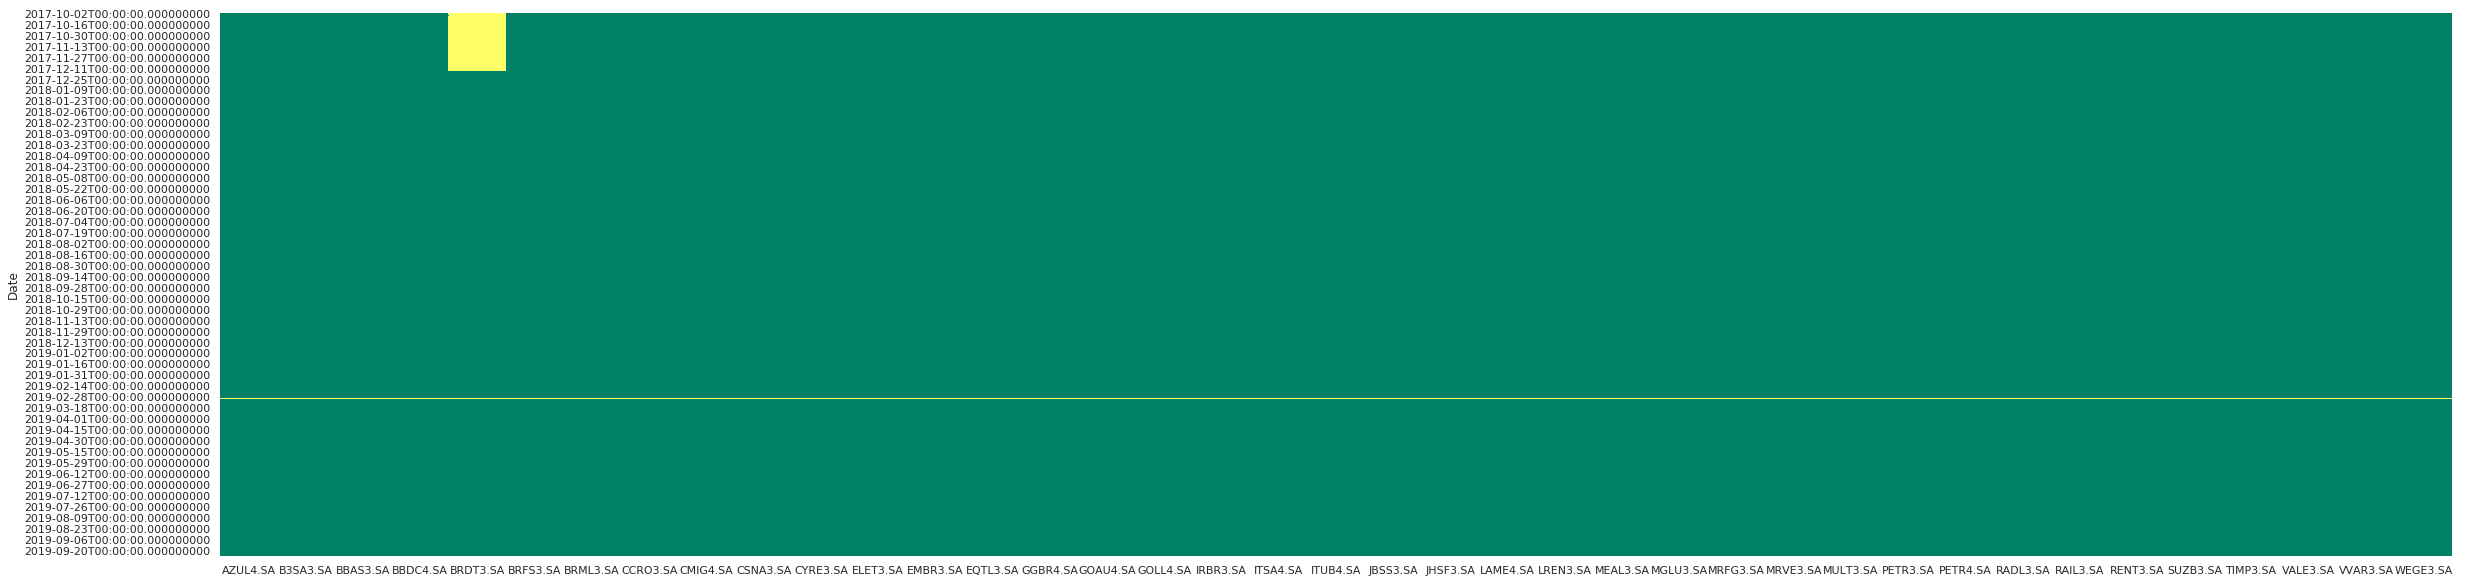

In [35]:
output = market_close
plt.figure(figsize=(40,10))
sns.heatmap(output.isnull(),  cbar=False, cmap = 'summer')
["Erros",np.sum(output.isnull().sum()),"Ativos",len(output.columns)]

['Erros', 0, 'Ativos', 39]

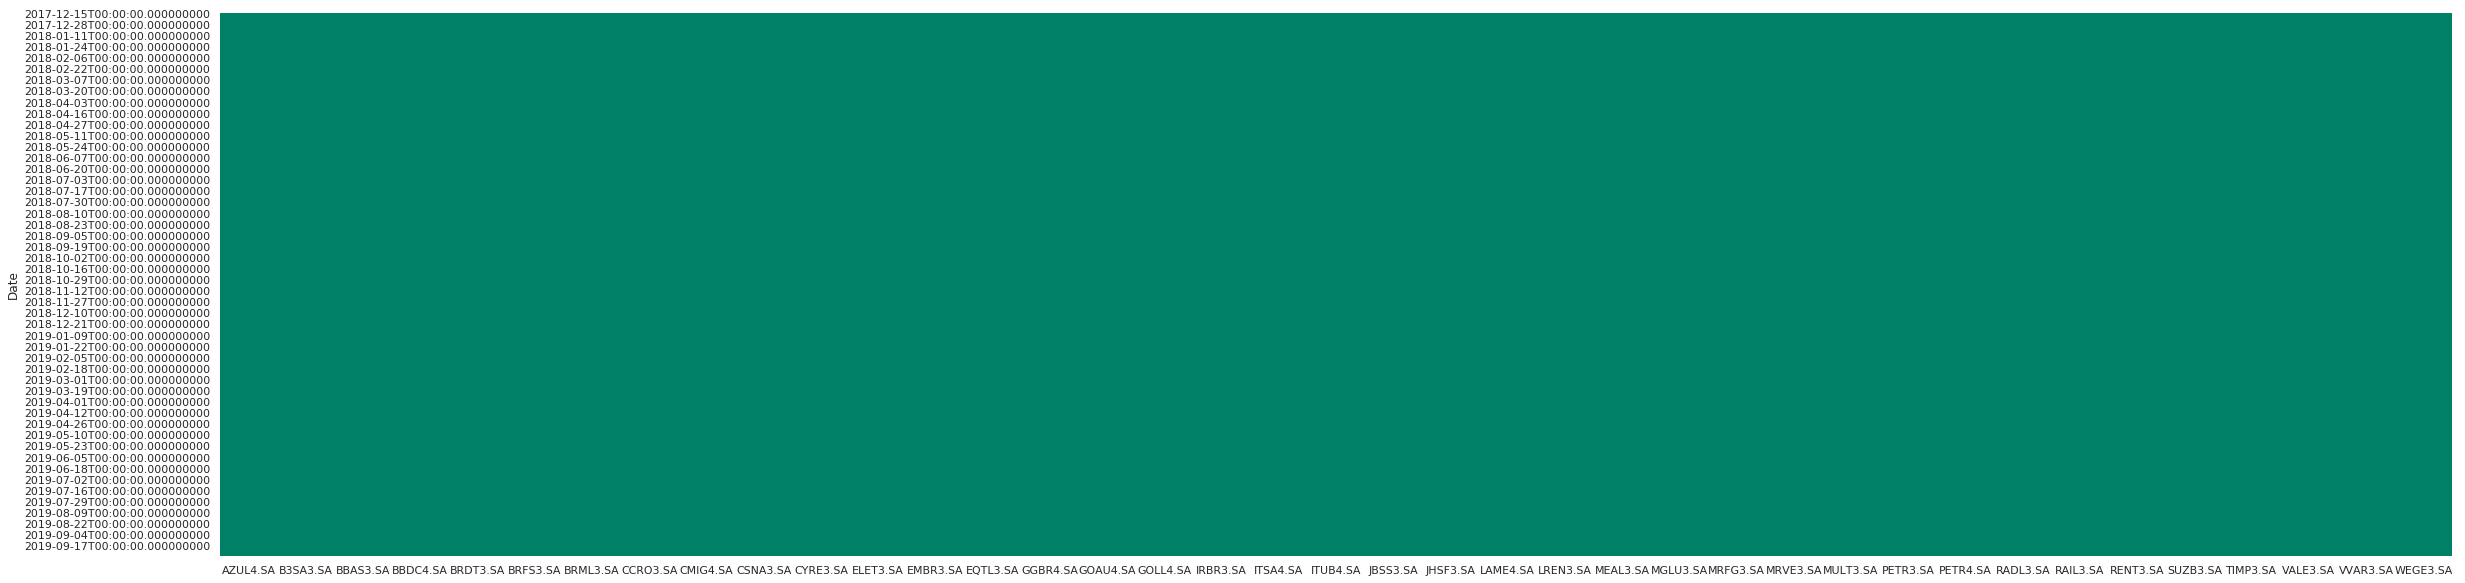

In [36]:
output=output.dropna(axis='index')
plt.figure(figsize=(40,10))
sns.heatmap(output.isnull(),  cbar=False, cmap = 'summer')
["Erros",np.sum(output.isnull().sum()),"Ativos",len(output.columns)]

Ativos com Melhor Relação em Cada Cluster: ['IRBR3.SA', 'MGLU3.SA', 'GOLL4.SA', 'CMIG4.SA', 'JBSS3.SA']


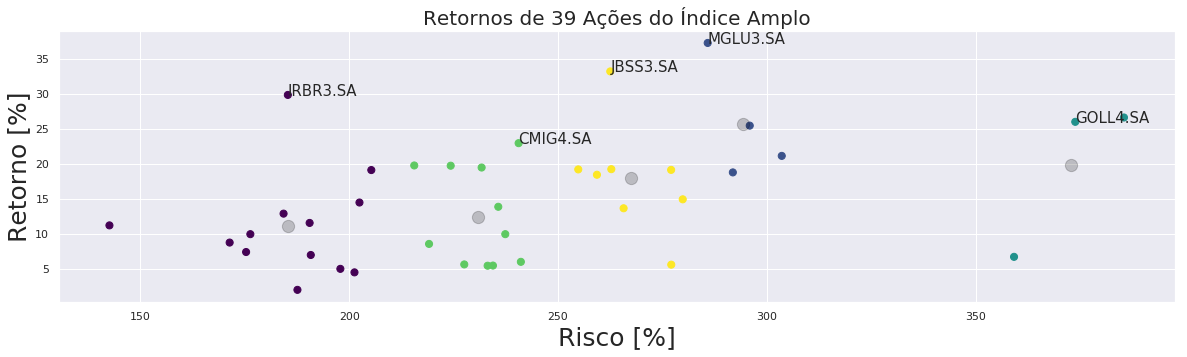

In [37]:
%matplotlib inline 
from sklearn.cluster import KMeans


retornos=100*output.pct_change()
stocks=retornos.columns


X=100*np.array([[np.std(retornos[sto]),np.mean(retornos[sto])] for sto in stocks])

N=5

kmeans = KMeans(n_clusters=N, random_state=0).fit(X)
y_kmeans = kmeans.predict(X)

fig = plt.subplots(figsize=(20,5))

ax1=plt.subplot(1,1, 1) 
ax1.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
ax1.set_title('Retornos de '+str(len(stocks))+' Ações do Índice Amplo',fontsize=20)
ax1.set_xlabel('Risco [%]',fontsize=25)
ax1.set_ylabel('Retorno [%]',fontsize=25)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=150, alpha=0.2);

best=[]
for i in range(N):
    ind=retornos[retornos.columns[np.where(y_kmeans==i)[0]]].mean()/retornos[retornos.columns[np.where(y_kmeans==i)[0]]].std()
    best.append(ind[ind==np.max(ind)])
rb=list(pd.DataFrame(best).columns)
print("Ativos com Melhor Relação em Cada Cluster:", rb)

for r in rb:
    plt.text(X[stocks==r][0][0],X[stocks==r][0][1],r,fontsize=15)

In [38]:
rb

['IRBR3.SA', 'MGLU3.SA', 'GOLL4.SA', 'CMIG4.SA', 'JBSS3.SA']

In [39]:
E_Day = 30
E_Month = 8
E_Year = 2020
S_Day = 30
S_Month = 8
S_Year = 2019

    ### Analise dos ativos com maior volume
stocks=yahoo(rb,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year)
stocks = stocks['Adj Close']
stocks.tail()

[*********************100%***********************]  5 of 5 downloaded


,CMIG4.SA,GOLL4.SA,IRBR3.SA,JBSS3.SA,MGLU3.SA
Date,,,,,
2020-08-24,10.72,18.34,7.93,24.52,87.08
2020-08-25,11.04,18.09,7.94,23.78,88.00
2020-08-26,10.57,17.55,7.69,23.35,90.15
2020-08-27,10.70,18.30,7.62,23.10,91.98
2020-08-28,10.89,18.98,7.50,22.88,94.58


['Erros', 0, 'Ativos', 5]

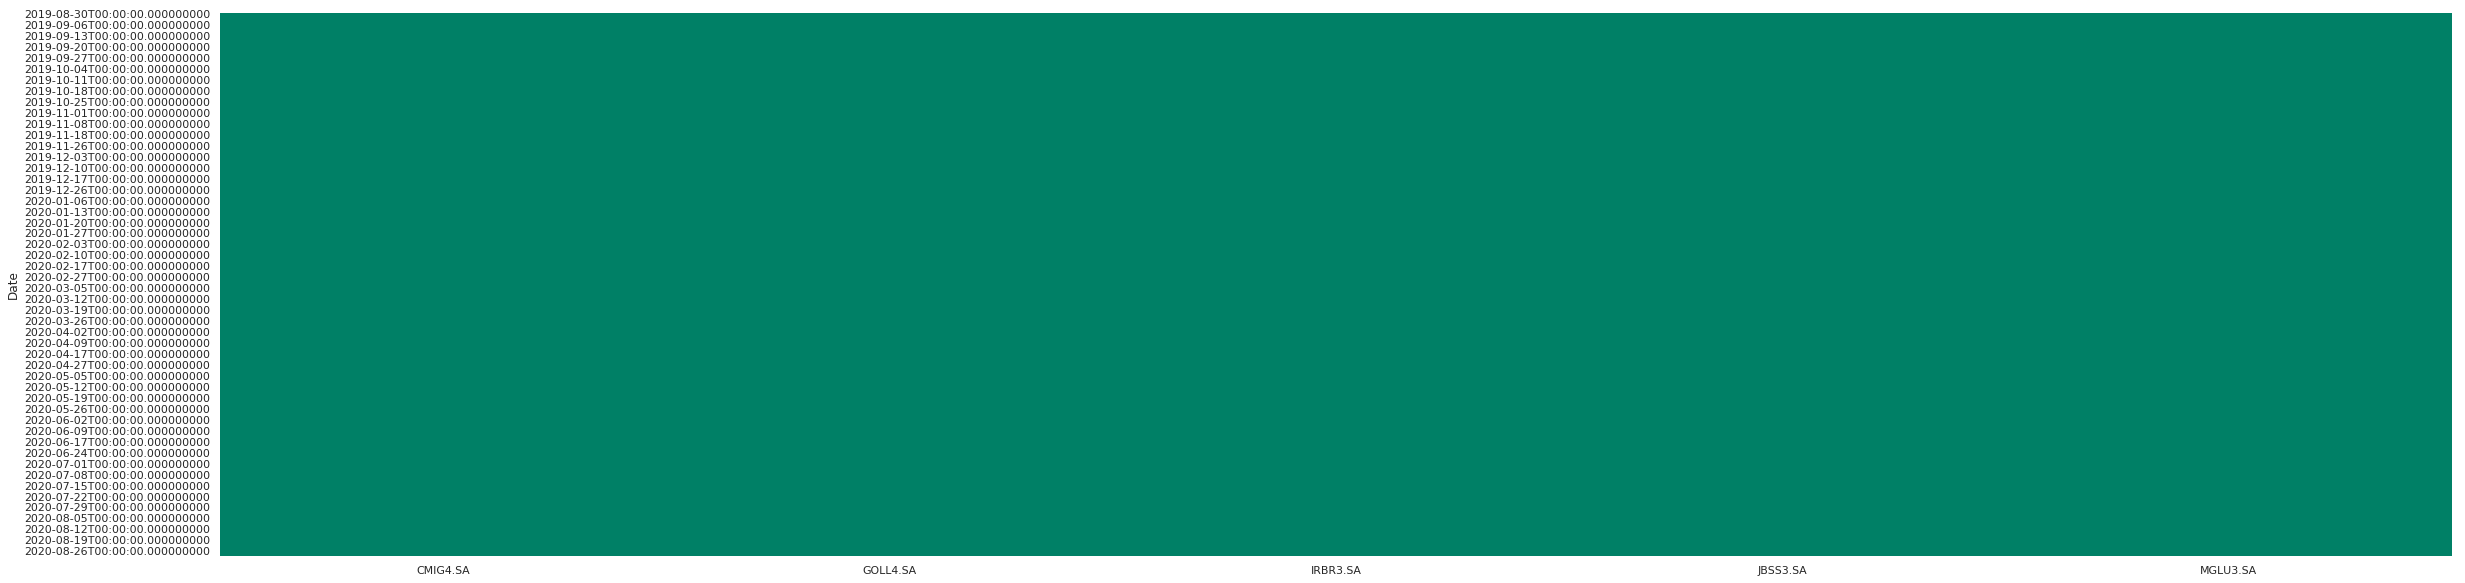

In [40]:
output = stocks
plt.figure(figsize=(40,10))
sns.heatmap(output.isnull(),  cbar=False, cmap = 'summer')
["Erros",np.sum(output.isnull().sum()),"Ativos",len(output.columns)]

['Erros', 0, 'Ativos', 5]

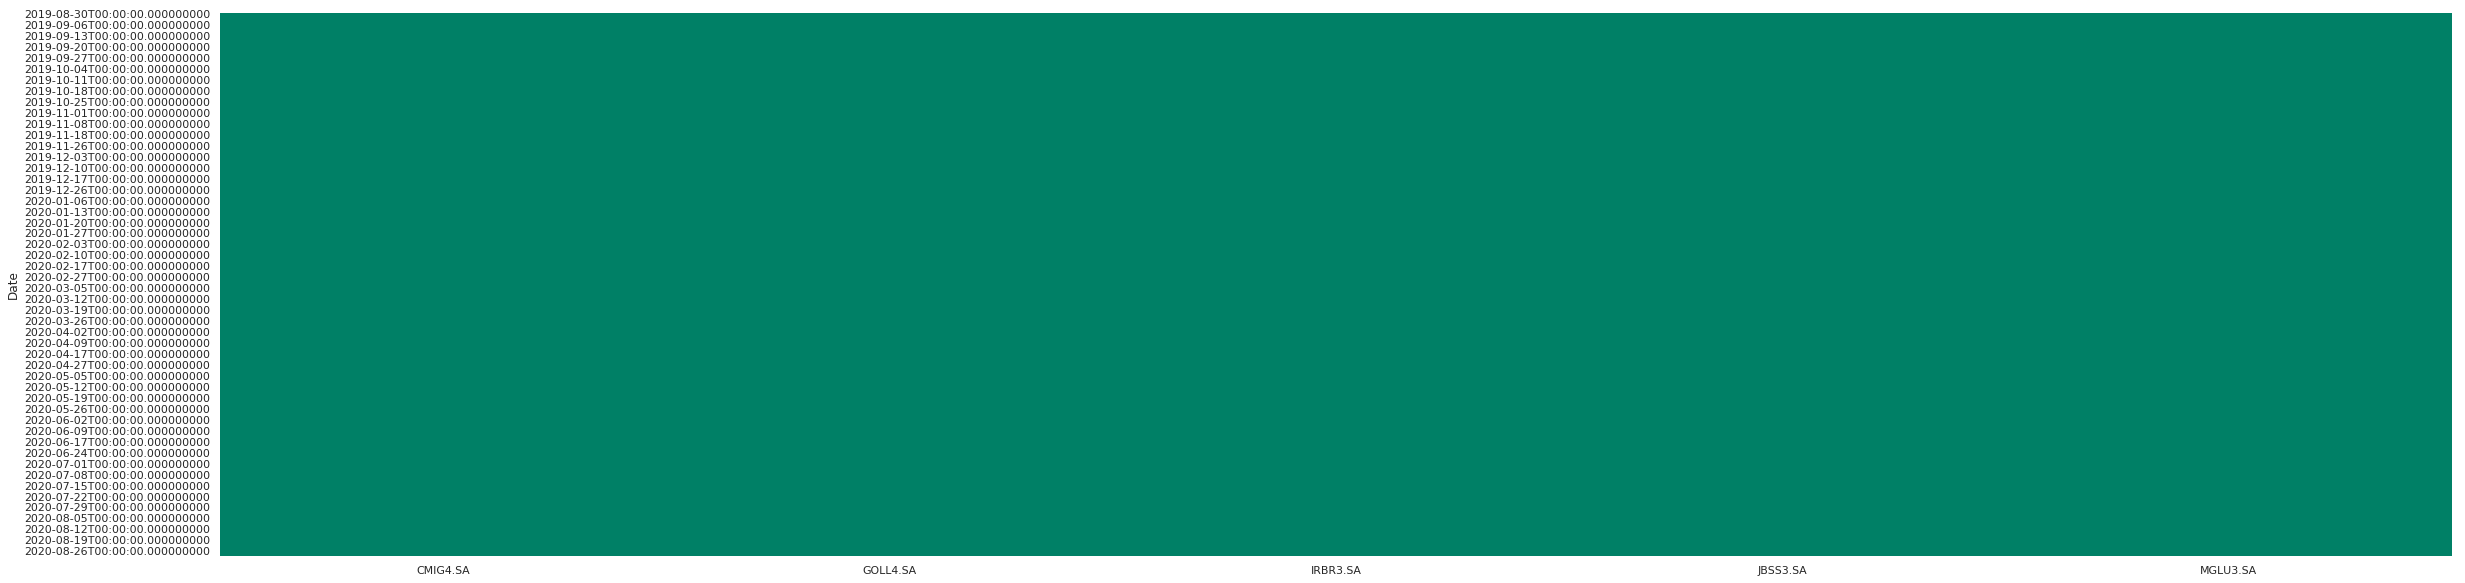

In [41]:
output=output.dropna(axis='index')
plt.figure(figsize=(40,10))
sns.heatmap(output.isnull(),  cbar=False, cmap = 'summer')
["Erros",np.sum(output.isnull().sum()),"Ativos",len(output.columns)]

In [42]:
stocks=output

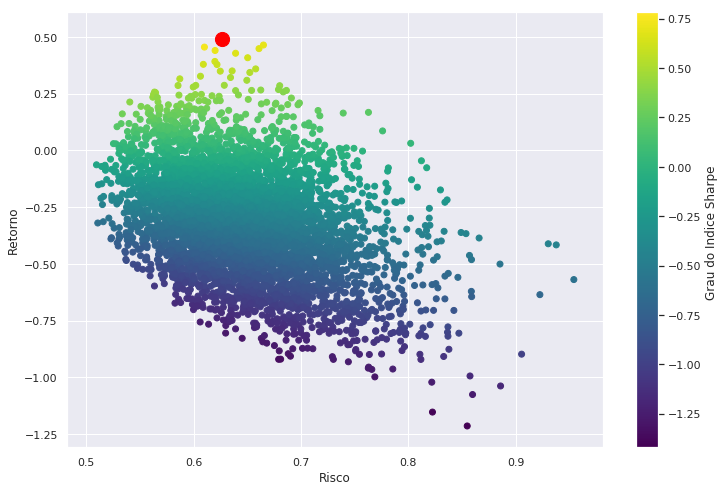

In [43]:
import random

# Markowits

log_ret = np.log(stocks / stocks.shift(1))

# Admite que a mesma sequencia randomica
np.random.seed(42)
num_ports = 5000
all_weights = np.zeros((num_ports, len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for x in range(num_ports):
    # Weights
    weights = np.array(np.random.random(len(stocks.columns)))
    weights = weights/np.sum(weights)

    # Save weights
    all_weights[x,:] = weights

    # Expected return
    ret_arr[x] = np.sum( (log_ret.mean() * weights * 252))

    # Expected volatility
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252, weights)))

    # Sharpe Ratio
    sharpe_arr[x] = ret_arr[x]/vol_arr[x]

# Para operar na venda utilize o agrmin()
maximo = sharpe_arr.argmax()
#maximo = sharpe_arr.argmin()

          

max_sr_ret = ret_arr[maximo]
max_sr_vol = vol_arr[maximo]

plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Grau do Indice Sharpe ')
plt.xlabel('Risco')
plt.ylabel('Retorno')
plt.scatter(max_sr_vol, max_sr_ret,c='red', s=200) # red dot
plt.show()

In [44]:
# Fator expectativa
exp = (max_sr_ret - max_sr_vol)/(max_sr_ret + max_sr_vol)
expec_real = 1 +(exp/100)
# exp = expec_real**252d

print("Expectativa de retorno diário:   %.3f" % exp + " %")

Expectativa de retorno diário:   -0.123 %


In [46]:
# Simulacao de compra
money = 1000
last_price = stocks[-1:].iloc[0]

# Pesos na carteira
df = pd.DataFrame(index=stocks.columns, columns = ['Pesos','Valor_investido'])
df['Pesos'] = all_weights[maximo]

                    
for i in range(len(stocks.columns)):
    stocks_qtd = money * all_weights[maximo][i]
    stocks_qtd = stocks_qtd / last_price[i]
    prop_value = stocks_qtd*last_price[i]
    df['Valor_investido'][i] = prop_value
    
    
    
    
    
    print("##=================="+stocks.iloc[i].index[i]+"==================##")
    print()
    print("Proporcao no portifolio          :    %.2f" %(all_weights[maximo][i]*100) +"%")
    print()
    print()
    print("Numero de papeis a comprar       :        %.0f" % stocks_qtd)
    print("Valor proporcional               : R$ %.2f" % prop_value)
    print()


##==================CMIG4.SA==================##

Proporcao no portifolio          :    7.93%


Numero de papeis a comprar       :        7
Valor proporcional               : R$ 79.29

##==================GOLL4.SA==================##

Proporcao no portifolio          :    2.32%


Numero de papeis a comprar       :        1
Valor proporcional               : R$ 23.19

##==================IRBR3.SA==================##

Proporcao no portifolio          :    7.31%


Numero de papeis a comprar       :        10
Valor proporcional               : R$ 73.05

##==================JBSS3.SA==================##

Proporcao no portifolio          :    14.64%


Numero de papeis a comprar       :        6
Valor proporcional               : R$ 146.39

##==================MGLU3.SA==================##

Proporcao no portifolio          :    67.81%


Numero de papeis a comprar       :        7
Valor proporcional               : R$ 678.09



/home/gobellek/.local/lib/python3.5/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [47]:
df

,Pesos,Valor_investido
CMIG4.SA,0.079286,79.2863
GOLL4.SA,0.023189,23.1889
IRBR3.SA,0.073051,73.0513
JBSS3.SA,0.146385,146.385
MGLU3.SA,0.678088,678.088


In [48]:
E_Day = 30
E_Month = 8+1
E_Year = 2020
S_Day = 30
S_Month = 8
S_Year = 2019

    ### Analise dos ativos com maior volume
stocks=yahoo(rb,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year)
stocks = stocks['Adj Close']
stocks.tail()

[*********************100%***********************]  5 of 5 downloaded


,CMIG4.SA,GOLL4.SA,IRBR3.SA,JBSS3.SA,MGLU3.SA
Date,,,,,
2020-09-23,10.33,17.86,6.30,21.62,86.48
2020-09-24,10.70,17.94,7.08,21.66,89.30
2020-09-25,10.46,17.84,7.17,21.60,90.63
2020-09-28,10.20,17.47,7.23,20.62,87.47
2020-09-29,10.13,16.47,7.31,20.36,87.48


In [50]:
# Fator expectativa por normalização de risco e retorno

exp = (max_sr_ret - max_sr_vol)/(max_sr_ret + max_sr_vol)
print("Expectativa de retorno médio diário :   %.3f" % exp + " %")

# Retorno médio dos ativos somados

retorno = stocks.diff().dropna().mean().sum()
print("Retorno real médio diário           :   %.3f" % retorno + " %")

# Cálculo do erro de previsão

erro = abs(exp - retorno)
erro = (erro / retorno)
print()
print("Taxa de erro da previsão            :   %.3f" % erro + " %")

Expectativa de retorno médio diário :   -0.123 %
Retorno real médio diário           :   -0.016 %

Taxa de erro da previsão            :   -6.641 %


In [51]:
retorno_real = stocks.iloc[-1] / stocks.iloc[0]
retorno_real

CMIG4.SA    0.750927
GOLL4.SA    0.496084
IRBR3.SA    0.212315
JBSS3.SA    0.702796
MGLU3.SA    2.432703
dtype: float64

In [52]:
df['Retorno_real'] = retorno_real
df

,Pesos,Valor_investido,Retorno_real
CMIG4.SA,0.079286,79.2863,0.750927
GOLL4.SA,0.023189,23.1889,0.496084
IRBR3.SA,0.073051,73.0513,0.212315
JBSS3.SA,0.146385,146.385,0.702796
MGLU3.SA,0.678088,678.088,2.432703


In [53]:
df['Montante_final'] = df['Valor_investido'] * df['Retorno_real']
df['Montante_final'].sum()

1839.017758994161

In [58]:
# Comparação do desempenho 

# Previsto
fator_multiplicador = ((len(stocks) * exp)/100)+1
port_predict = money * fator_multiplicador

print("Previsão de montante acumulado      : R$ %.2f" % port_predict)
print()
print("Montante real acumulado             : R$ %.2f" % df['Montante_final'].sum())

Previsão de montante acumulado      : R$ 670.23

Montante real acumulado             : R$ 1839.02
